In [119]:
import numpy as np
import pandas as pd

A company has several orders to process. For each order we must complete a certain task with a given effort (the actual time required to complete the task). We want to distribute the total effort among the teams (team_A, team_B, team_C).

#### Generate data

Generate a dataframe with 3 columns:

**Order**: "order1", "order2", ...

**Task**: random choice between ["task_1", "task_2", "task_3", "task_4"]

**Effort**: random int uniformly distributed in range (5, 20)

In [120]:
n_orders = 10

df = pd.DataFrame({
    "Order": ["order_{}".format(i) for i in range(1, n_orders+1)],
    "Task": np.random.choice(["task_1", "task_2", "task_3", "task_4"], size=n_orders),
    "Effort": np.random.uniform(5, 20, size=n_orders).astype(int) # in hours
})

In [121]:
df

,Order,Task,Effort
0,order_1,task_4,11
1,order_2,task_3,13
2,order_3,task_1,8
3,order_4,task_2,9
4,order_5,task_4,18
5,order_6,task_3,9
6,order_7,task_1,18
7,order_8,task_2,12
8,order_9,task_4,6
9,order_10,task_1,13


#### Calculate total effort by task

In [122]:
df = df.groupby(by=['Task']).sum()

In [123]:
df

,Effort
Task,
task_1,39
task_2,21
task_3,22
task_4,35


In [124]:
df = df.reset_index()

In [125]:
df

,Task,Effort
0,task_1,39
1,task_2,21
2,task_3,22
3,task_4,35


In [126]:
df['Effort'].sum()

117

<BarContainer object of 4 artists>

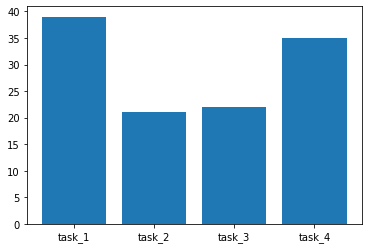

In [127]:
import matplotlib.pyplot as plt

plt.bar(df['Task'], df['Effort'])

#### Each team can handle only specific tasks.

**team_A**: task_1, task_2

**team_B**: task_1, task_3

**team_C**: task_2, task_4

Build a dataframe with two columns:

**Task**

**Team**

If a task can be handled by more than one team the row must be repeated

In [128]:
d = {
    "team_A": ["task_1", "task_2"],
     "team_B": ["task_1", "task_3"],
     "team_C": ["task_2", "task_4"]
}

In [129]:
df_task_team = pd.DataFrame()

for team, tasks in d.items():
    for task in tasks:
        df_task_team = df_task_team.append({"Task": task, "Team": team}, ignore_index=True)

In [130]:
df_task_team

,Task,Team
0,task_1,team_A
1,task_2,team_A
2,task_1,team_B
3,task_3,team_B
4,task_2,team_C
5,task_4,team_C


In [131]:
df_task_team = df_task_team.drop_duplicates()

#### Distribute effort among teams. If two or more teams can handle a task, then the effort must be divided among these teams.

In [132]:
df = df.merge(df_task_team, on=['Task'])

In [133]:
df

,Task,Effort,Team
0,task_1,39,team_A
1,task_1,39,team_B
2,task_2,21,team_A
3,task_2,21,team_C
4,task_3,22,team_B
5,task_4,35,team_C


In [134]:
df['N_teams'] = df.groupby(by=['Task'])['Team'].transform('count')
df

,Task,Effort,Team,N_teams
0,task_1,39,team_A,2
1,task_1,39,team_B,2
2,task_2,21,team_A,2
3,task_2,21,team_C,2
4,task_3,22,team_B,1
5,task_4,35,team_C,1


In [135]:
df['TeamEffort'] = df['Effort']/df['N_teams']
df

,Task,Effort,Team,N_teams,TeamEffort
0,task_1,39,team_A,2,19.5
1,task_1,39,team_B,2,19.5
2,task_2,21,team_A,2,10.5
3,task_2,21,team_C,2,10.5
4,task_3,22,team_B,1,22.0
5,task_4,35,team_C,1,35.0


In [136]:
df['TeamEffort'].sum()

117.0

In [137]:
df.groupby(by=['Team'])['TeamEffort'].sum()

Team
team_A    30.0
team_B    41.5
team_C    45.5
Name: TeamEffort, dtype: float64

<BarContainer object of 3 artists>

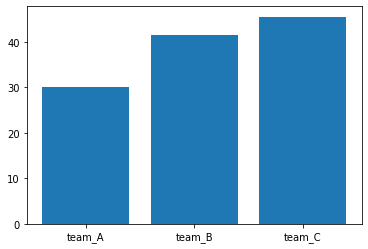

In [138]:
import matplotlib.pyplot as plt

effort_by_team = df.groupby(by=['Team'])['TeamEffort'].sum()

plt.bar(effort_by_team.index, effort_by_team)